In [1]:
### PLOTTING, LINEAR ALGEBRA, DATAFRAMES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
### MACHINE LEARNING
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import VarianceThreshold, SelectKBest,f_classif,mutual_info_classif
### API
from flask import Flask, request, jsonify

In [2]:
#LOADING AND VIEWING THE DATAFRAME
FullData = pd.read_csv("C://jupyter//PayBack Task//customerGroups.csv")
FullData.head()

,g1_1,g1_2,g1_3,g1_4,g1_5,g1_6,g1_7,g1_8,g1_9,g1_10,...,c_20,c_21,c_22,c_23,c_24,c_25,c_26,c_27,c_28,target
0,4.50,1,3,4,5,1,1,4,6,0,...,-0.383704,-0.065449,0.584000,0.488000,0,-3.232000,-1.944000,-0.007944,1.76,2
1,2.20,24,22,46,10,24,28,18,22,-4,...,-0.346839,-0.159744,-0.947614,0.463540,0,-5.342174,-1.321355,0.181064,1.85,1
2,12.00,7,4,11,18,8,11,2,10,-3,...,-2.673934,-1.592303,0.525305,-0.467169,0,-6.566521,-4.176403,-0.040277,2.05,2
3,1.91,8,5,13,14,6,7,6,9,-1,...,0.616027,0.404945,-1.506923,0.741964,0,-2.438120,-0.787132,-0.012101,1.82,0
4,2.50,23,16,39,14,33,25,18,27,8,...,-1.057214,-1.159294,0.751012,-0.182052,0,-1.259728,0.059574,0.042613,1.99,2


In [3]:
# CHECKING THE DATAFRAME INFORMATION
FullData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6620 entries, 0 to 6619
Data columns (total 71 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   g1_1    6620 non-null   float64
 1   g1_2    6620 non-null   int64  
 2   g1_3    6620 non-null   int64  
 3   g1_4    6620 non-null   int64  
 4   g1_5    6620 non-null   int64  
 5   g1_6    6620 non-null   int64  
 6   g1_7    6620 non-null   int64  
 7   g1_8    6620 non-null   int64  
 8   g1_9    6620 non-null   int64  
 9   g1_10   6620 non-null   int64  
 10  g1_11   6620 non-null   int64  
 11  g1_12   6620 non-null   int64  
 12  g1_13   6620 non-null   float64
 13  g1_14   6620 non-null   float64
 14  g1_15   6620 non-null   float64
 15  g1_16   6620 non-null   float64
 16  g1_17   6620 non-null   float64
 17  g1_18   6620 non-null   float64
 18  g1_19   6620 non-null   float64
 19  g1_20   6620 non-null   float64
 20  g1_21   6620 non-null   float64
 21  g2_1    6620 non-null   float64
 22  

In [5]:
###Creating a DataFrame summary
FullData.describe()

,g1_1,g1_2,g1_3,g1_4,g1_5,g1_6,g1_7,g1_8,g1_9,g1_10,...,c_20,c_21,c_22,c_23,c_24,c_25,c_26,c_27,c_28,target
count,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,...,6620.000000,6620.000000,6620.000000,6620.000000,6620.00000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000
mean,2.708779,14.424018,10.485650,24.909668,10.988066,13.412085,10.161027,10.745468,14.169033,3.251057,...,-0.029311,-0.006724,-0.004147,0.008827,0.00000,-0.228426,-0.103728,0.000408,1.917134,1.031722
std,1.857725,10.700787,8.384203,18.174948,5.635985,10.090030,7.495039,7.964247,9.866734,8.481210,...,1.220752,1.068199,0.663238,0.683422,0.32287,3.390902,1.944419,0.092761,0.302175,0.731042
min,1.050000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-27.000000,...,-4.684111,-4.319826,-2.512919,-3.118836,-2.00000,-15.202740,-9.181722,-0.750000,0.000000,0.000000
25%,1.667000,6.000000,4.000000,10.000000,6.000000,5.000000,4.000000,4.000000,6.000000,-2.000000,...,-0.716407,-0.531224,-0.440407,-0.406811,0.00000,-2.222226,-1.293471,-0.054331,1.710000,0.000000
50%,2.150000,13.000000,9.000000,22.000000,11.000000,12.000000,9.000000,9.000000,13.000000,1.000000,...,0.000000,0.000000,0.000000,0.001070,0.00000,-0.119378,-0.012487,0.000000,1.850000,1.000000
75%,2.800000,21.000000,15.000000,36.000000,16.000000,20.000000,15.000000,16.000000,21.000000,7.000000,...,0.654627,0.490504,0.410915,0.450104,0.00000,1.809334,1.035235,0.054825,2.020000,2.000000
max,23.000000,52.000000,47.000000,94.000000,20.000000,61.000000,43.000000,48.000000,52.000000,48.000000,...,4.821136,4.396281,2.987136,2.830550,2.00000,12.562698,8.209578,0.666667,4.330000,2.000000


<Axes: >

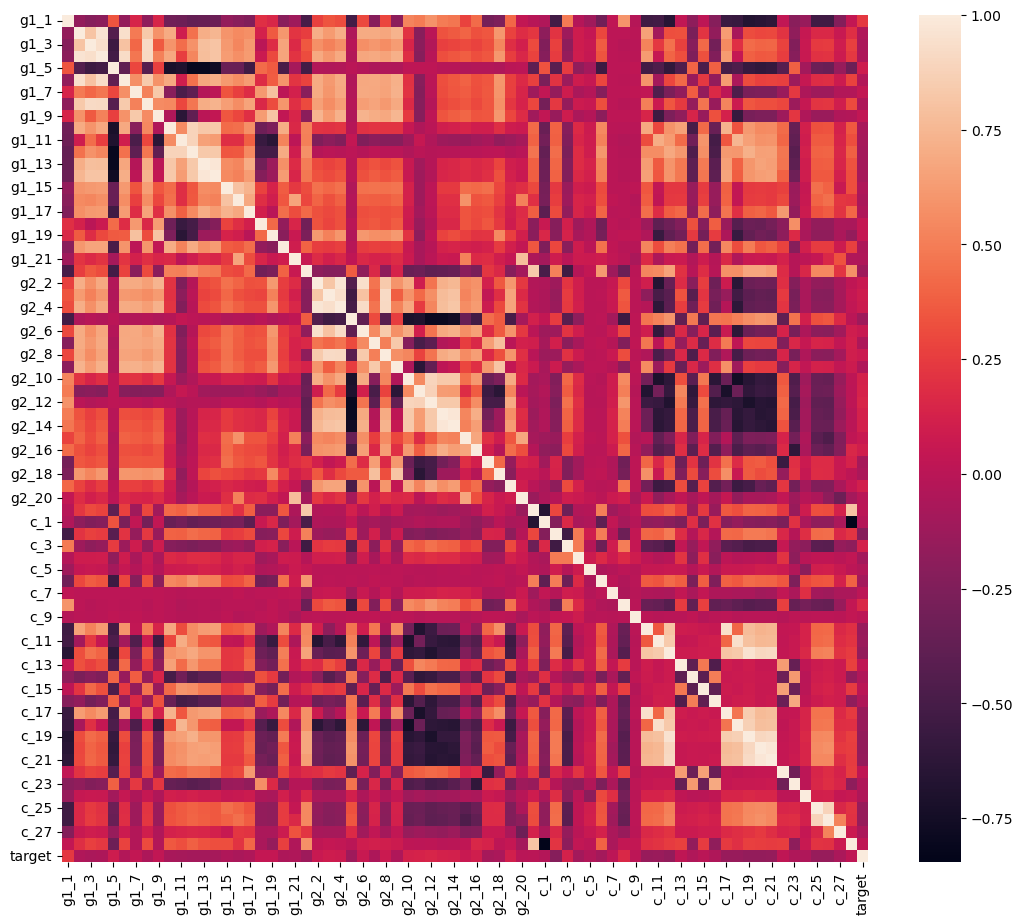

In [6]:
#SEARCHING FOR CORELATIONS IN THE DATAFRAM 

corr_data = FullData.corr()

figure(num=None, figsize=(13, 11))

sns.heatmap(corr_data)

In [8]:
### GETTING RID OF THE POST CAMPAIGN VARIABLES 
pre_camp_data = FullData.drop(['g1_21', 'g2_21', 'c_28'], axis = 1)

Percentage of campaigns with Group 1 as most profitable:  46.47
Percentage of campaigns with Group 2 as most profitable:  28.35
Percentage of campaigns with neither group as most profitable:  25.18


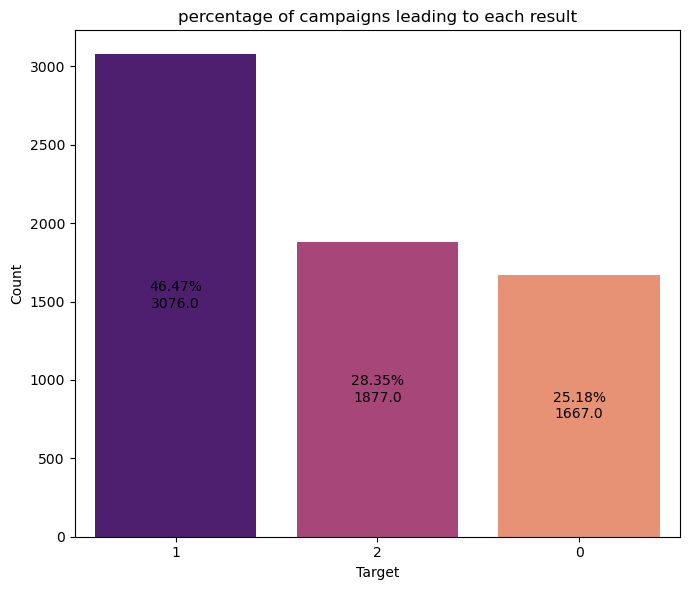

In [9]:
### VISUALIZING TARGET COUNTS & CALCULATING THEIR % IN THE DATAFRAME

percentage_group1 = (FullData['target'].value_counts(normalize=True)[1]) * 100
percentage_group2 = (FullData['target'].value_counts(normalize=True)[2]) * 100
percentage_neither = (FullData['target'].value_counts(normalize=True)[0]) * 100

print("Percentage of campaigns with Group 1 as most profitable: ", round(percentage_group1, 2))
print("Percentage of campaigns with Group 2 as most profitable: ", round(percentage_group2, 2))
print("Percentage of campaigns with neither group as most profitable: ", round(percentage_neither, 2))
# plotting target count data
figure(num=None, figsize=(7, 6))

sns.countplot(x=FullData["target"], palette="magma", order=FullData["target"].value_counts().index)

# Adding value counts and percentages
ax = plt.gca()
total = len(FullData["target"])
for p in ax.patches:
    count = p.get_height()
    percentage = f"{(count / total) * 100:.2f}%"
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() / 2  
    ax.annotate(f"{percentage}\n{count}", (x, y),
                ha='center', va='center', color='black', size=10)  

plt.xlabel("Target")
plt.ylabel("Count")
plt.title("percentage of campaigns leading to each result")
plt.tight_layout()
plt.show()

In [11]:
### Declaring X and y variables for ML models
X = pre_camp_data.drop(['target'],axis=1)
y = pre_camp_data['target']
### Setting the test size to 20% of the data set and train size to 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
### Logistic Regression model building

model_logi = LogisticRegression(max_iter=7000) #default iteration cap is set to 100, which is not optimal for this dataset. It creates errors.

model_logi.fit(X_train, y_train) # model training

y_pred_logi = model_logi.predict(X_test)  # Making predictions on the testing data


cv_scores_logi = cross_val_score(model_logi, X, y, cv=5) # Cross-Validating the model

accuracy_logi = accuracy_score(y_test, y_pred_logi)  # Calculating models accuracy

print("Cross-Validation Scores:", cv_scores_logi)
print("Average CV Score:", cv_scores_logi.mean())
print("\n","Accuracy:", accuracy_logi)
print("\n",classification_report(y_test, y_pred_logi))

Cross-Validation Scores: [0.59365559 0.55740181 0.57024169 0.58006042 0.5755287 ]
Average CV Score: 0.5753776435045317

 Accuracy: 0.5853474320241692

               precision    recall  f1-score   support

           0       0.48      0.04      0.08       328
           1       0.59      0.88      0.71       604
           2       0.59      0.58      0.58       392

    accuracy                           0.59      1324
   macro avg       0.55      0.50      0.46      1324
weighted avg       0.56      0.59      0.51      1324



In [14]:
### Random Forest Classifier model building
### Simmilar steps to previous and future model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

model_rf.fit(X_train, y_train)


y_pred_rf = model_rf.predict(X_test)

cv_scores_rf = cross_val_score(model_rf, X, y, cv=5)

accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("Cross-Validation Scores:", cv_scores_rf)
print("Average CV Score:", cv_scores_rf.mean())
print("\n","Accuracy:", accuracy_rf)
print("\n",classification_report(y_test, y_pred_rf))

Cross-Validation Scores: [0.57854985 0.5694864  0.57099698 0.57250755 0.5641994 ]
Average CV Score: 0.5711480362537764

 Accuracy: 0.573262839879154

               precision    recall  f1-score   support

           0       0.30      0.12      0.17       328
           1       0.63      0.80      0.70       604
           2       0.55      0.60      0.58       392

    accuracy                           0.57      1324
   macro avg       0.49      0.51      0.48      1324
weighted avg       0.53      0.57      0.53      1324



In [15]:
# Create a Gradient Boosting model 
model_gb = GradientBoostingClassifier(learning_rate=0.1, n_estimators=10, max_depth=6, min_samples_split=2, random_state=42)

# Train the Gradient Boosting model
model_gb.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_gb = model_gb.predict(X_test)

cv_scores_gb = cross_val_score(model_gb, X, y, cv=5)


# Evaluate the Gradient Boosting model
accuracy_gb = accuracy_score(y_test, y_pred_gb)

print("Cross-Validation Scores:", cv_scores_gb)
print("Average CV Score:", cv_scores_gb.mean())
print("\n","Accuracy:", accuracy_gb)
print("\n", classification_report(y_test, y_pred_gb))

Cross-Validation Scores: [0.58006042 0.57099698 0.58685801 0.57477341 0.57175227]
Average CV Score: 0.5768882175226586

 Accuracy: 0.5966767371601208

               precision    recall  f1-score   support

           0       0.38      0.08      0.13       328
           1       0.61      0.86      0.72       604
           2       0.60      0.62      0.61       392

    accuracy                           0.60      1324
   macro avg       0.53      0.52      0.49      1324
weighted avg       0.55      0.60      0.54      1324



In [16]:
### MODEL EFFECTIVNESS COMPARISON

# Defining a function to calculate and print the evaluation 
def print_evaluation_results(model_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    
    print(f"{model_name} Results:")
    print("Accuracy:", round(accuracy, 4))
    print("Precision:", round(precision, 4))
    print("Recall:", round(recall, 4))
    print("F1-score:", round(f1, 4), "\n")


# Logistic Regression
print_evaluation_results("Logistic Regression", y_test, y_pred_logi)

# Random Forest Classifier
print_evaluation_results("Random Forest Classifier", y_test, y_pred_rf)

# Gradient Boosting Classifier
print_evaluation_results("Gradient Boosting Classifier", y_test, y_pred_gb)

Logistic Regression Results:
Accuracy: 0.5853
Precision: 0.5615
Recall: 0.5853
F1-score: 0.5145 

Random Forest Classifier Results:
Accuracy: 0.5733
Precision: 0.5253
Recall: 0.5733
F1-score: 0.5339 

Gradient Boosting Classifier Results:
Accuracy: 0.5967
Precision: 0.5508
Recall: 0.5967
F1-score: 0.5411 



In [17]:
### Gathering predictions
logi_predictions = model_logi.predict(X)
rf_predictions = model_rf.predict(X)
gb_predictions = model_gb.predict(X)

In [19]:
### Displaying value counts for each models predictions 
logi_predictions_counts = pd.Series(logi_predictions).value_counts()
rf_predictions_counts = pd.Series(rf_predictions).value_counts()
gb_predictions_counts = pd.Series(gb_predictions).value_counts()


print("\n","Logistic Regression predictions:")
print(logi_predictions_counts)
print("\n","Random Forest predictions:")
print(rf_predictions_counts)
print("\n","Gradient Boosting predictions:")
print(gb_predictions_counts)


 Logistic Regression predictions:
1    4426
2    2017
0     177
dtype: int64

 Random Forest predictions:
1    3244
2    1911
0    1465
dtype: int64

 Gradient Boosting predictions:
1    4241
2    1939
0     440
dtype: int64


In [20]:
# Accessing feature importances
feature_importances = model_gb.feature_importances_

# Creating a DataFrame to show feature importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

   Feature    Importance
41     c_2  4.445543e-01
0     g1_1  4.073038e-02
43     c_4  2.952212e-02
20    g2_1  2.894457e-02
40     c_1  2.538092e-02
..     ...           ...
6     g1_7  1.412928e-03
46     c_7  1.397046e-03
63    c_24  1.339631e-03
45     c_6  1.101182e-03
44     c_5  5.081845e-07

[67 rows x 2 columns]


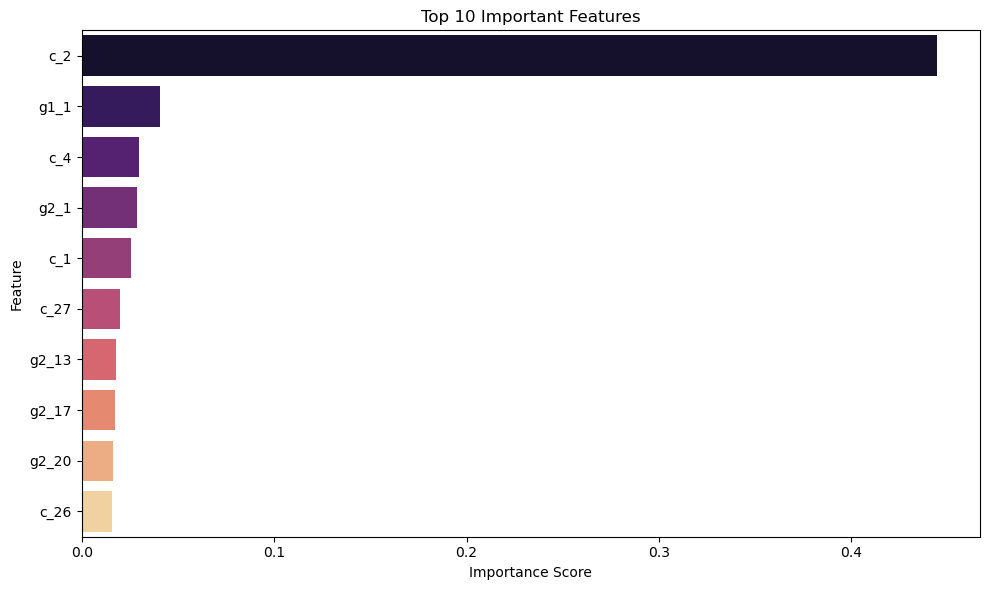

In [22]:
#Plotting the most important features
top_10_features = importance_df.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_10_features, palette='magma')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Top 10 Important Features')
plt.tight_layout()
plt.show()

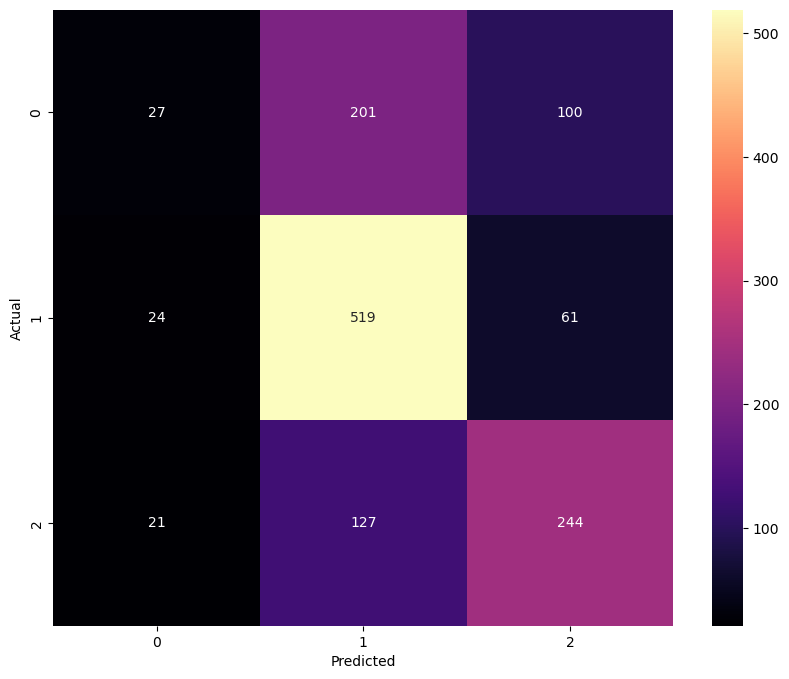

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_gb)

# Ploting the predictions the heatmap
plt.figure(figsize=(10,8 ))
sns.heatmap(cm, annot=True, fmt="d", cmap="magma")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()